                                                                                            Tatiana Sycheva

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, OneHotEncoder, StandardScaler
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
import seaborn as sns

In [6]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [7]:
full_dataset.describe(include='all').round()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,60198,60198,60198,60198.0,60198,60198,60198.0,60193,59759,60174,...,60168,58205,60198.0,60198.0,16819,11892,19136,8812.0,56129.0,51969.0
unique,60198,57284,57290,NaN,19431,1202,NaN,3318,3192,22771,...,60145,58126,NaN,NaN,3503,11529,18920,NaN,NaN,NaN
top,tt0000574,The Three Musketeers,The Three Musketeers,NaN,2010,Drama,NaN,USA,English,Michael Curtiz,...,"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",Mail,NaN,NaN,$ 1000000,$ 1000000,$ 8144,NaN,NaN,NaN
freq,1,8,8,NaN,101,8498,NaN,22080,27008,86,...,13,7,NaN,NaN,512,19,16,NaN,NaN,NaN
mean,NaN,NaN,NaN,1985.0,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,6.0,10492.0,NaN,NaN,NaN,56.0,45.0,27.0
std,NaN,NaN,NaN,23.0,NaN,NaN,23.0,NaN,NaN,NaN,...,NaN,NaN,1.0,56868.0,NaN,NaN,NaN,18.0,153.0,56.0
min,NaN,NaN,NaN,1906.0,NaN,NaN,40.0,NaN,NaN,NaN,...,NaN,NaN,1.0,100.0,NaN,NaN,NaN,1.0,1.0,1.0
25%,NaN,NaN,NaN,1970.0,NaN,NaN,88.0,NaN,NaN,NaN,...,NaN,NaN,5.0,206.0,NaN,NaN,NaN,43.0,4.0,3.0
50%,NaN,NaN,NaN,1992.0,NaN,NaN,95.0,NaN,NaN,NaN,...,NaN,NaN,6.0,503.0,NaN,NaN,NaN,56.0,10.0,8.0
75%,NaN,NaN,NaN,2005.0,NaN,NaN,107.0,NaN,NaN,NaN,...,NaN,NaN,7.0,2000.0,NaN,NaN,NaN,68.0,28.0,24.0


In [8]:
full_dataset.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      5
language                   439
director                    24
writer                     808
production_company        2744
actors                      30
description               1993
avg_vote                     0
votes                        0
budget                   43379
usa_gross_income         48306
worlwide_gross_income    41062
metascore                51386
reviews_from_users        4069
reviews_from_critics      8229
dtype: int64

### Part 1.

Formalization and Evaluation criteria

1.1 Select target variable, explain choice. Separate target variable from the feature matrix.




- In this case, it's better to choose either the `"Metascore"` or `"Avg_vote"` variables. Financial values, such as "usa_gross_income" and "worldwide_gross_income," have many missing values, accounting for more than 2/3 of the data.
    

- `"Avg_vote"` represents IMDb ratings, offering a unique perspective on a movie's popularity and its appeal to a broader audience. I have chosen this variable because of its significance in evaluating movies.

In [9]:
target_value = full_dataset['avg_vote']


- I prone to choose the `regression model`, specifically aimed at predicting the rating of a movie. Our target variable, `"Avg_vote"` is a good measure of success for the film-producing company as it represents a movie's critical and audience reception. Than "Avg_vote" is a higher, than a better-performing movie in terms of quality.

1.3 Select a metric

- The common metric for this regression task usually will be `Mean Absolute Error (MAE)` and `Root Mean Square Error (RMSE)`:

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(_ , _)

rmse = np.sqrt(mean_squared_error(_ , _))

### Part 2.

Explore and preprocess the data

In [11]:
full_dataset.dtypes

imdb_title_id             object
title                     object
original_title            object
year                       int64
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

- We have incorrect data types for the `budget`,`usa_gross_income`, and `worlwide_gross_income` columns, all of which are currently of type 'object'. The primary reason for this data type is the inclusion of currency symbols. Since these parameters exhibit multicollinearity, we need to choose one to use. In case of `worlwide_gross_income`, we have data for only one-third of the entries, we will need to address the missing values accordingly.

In [12]:
full_dataset['worlwide_gross_income'] = full_dataset.worlwide_gross_income.str.extract('(\d+)')

- We should drop certain features from the dataset. The reasons for doing so are as follows:

1. Uniqueness: The features `imdb_title_id`, `title`, and `original_title` are unique identifiers and do not provide valuable information for analysis or modeling.

2. Specificity of Data: Features such as `year`, and `budget` contain information that is too specific or not relevant to the analysis or prediction task.

3. Multicollinearity: The feature `usa_gross_income` exhibits multicollinearity. Additionally, if the features `votes` exhibit a high correlation with the target variable `avg_vote`, it may also be beneficial to drop `votes` to prevent any potential bias in the analysis.
4. Text-based columns: these columns would require more complicated text analysis to use in a linear regression model: `description`
5.  A lot of missing values: `metascore`, `worlwide_gross_income`

In [13]:
len(full_dataset.columns)

22

In [14]:
drops = [
    "imdb_title_id",
    "title",
    "original_title",
    "date_published",
    "description",
    "usa_gross_income",
    "budget",
    "metascore",
    "votes",
    "worlwide_gross_income"
]
full_dataset = full_dataset.drop(columns = drops)

In [15]:
print(full_dataset.columns)
print(len(full_dataset.columns))

Index(['year', 'genre', 'duration', 'country', 'language', 'director',
       'writer', 'production_company', 'actors', 'avg_vote',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')
12


In [16]:
full_dataset.isnull().sum()

year                       0
genre                      0
duration                   0
country                    5
language                 439
director                  24
writer                   808
production_company      2744
actors                    30
avg_vote                   0
reviews_from_users      4069
reviews_from_critics    8229
dtype: int64

In [17]:
full_dataset.dtypes

year                      int64
genre                    object
duration                  int64
country                  object
language                 object
director                 object
writer                   object
production_company       object
actors                   object
avg_vote                float64
reviews_from_users      float64
reviews_from_critics    float64
dtype: object

We need to handle data with missing values (Nan). Let's do it in different ways:

In [18]:
# Delete rows with a small value of gaps:

full_dataset = full_dataset.dropna(subset=['director', 'country'])

In [19]:
# Change some rows with gaps on 'Other':

full_dataset[['language', 'writer', 'production_company']] = full_dataset[['language', 'writer', 'production_company']].fillna('Other')

In [20]:
# Fill some rows with gaps on mean values:

num_gaps_features = ['reviews_from_users', 'reviews_from_critics']
full_dataset[num_gaps_features] = full_dataset[num_gaps_features].fillna(full_dataset[num_gaps_features].mean())

In [21]:
full_dataset.isnull().sum()

year                     0
genre                    0
duration                 0
country                  0
language                 0
director                 0
writer                   0
production_company       0
actors                  27
avg_vote                 0
reviews_from_users       0
reviews_from_critics     0
dtype: int64

2.1. Explore you data: make plots, print tables. Make sure to write your observations. Do not forget to fill-in missing values, define relevant columns transformatios.

Let's create a plot that illustrates how the average vote is influenced by the movie's production year:

In [22]:
vote_by_year = full_dataset.groupby('year', as_index=False)[['avg_vote']].mean()
vote_by_year = vote_by_year[~vote_by_year['avg_vote'].isna()]
vote_by_year

,year,avg_vote
0,1906,6.100000
1,1911,6.300000
2,1912,6.020000
3,1913,6.584615
4,1914,6.233333
...,...,...
105,2015,5.748039
106,2016,5.862637
107,2017,5.791176
108,2018,6.104000


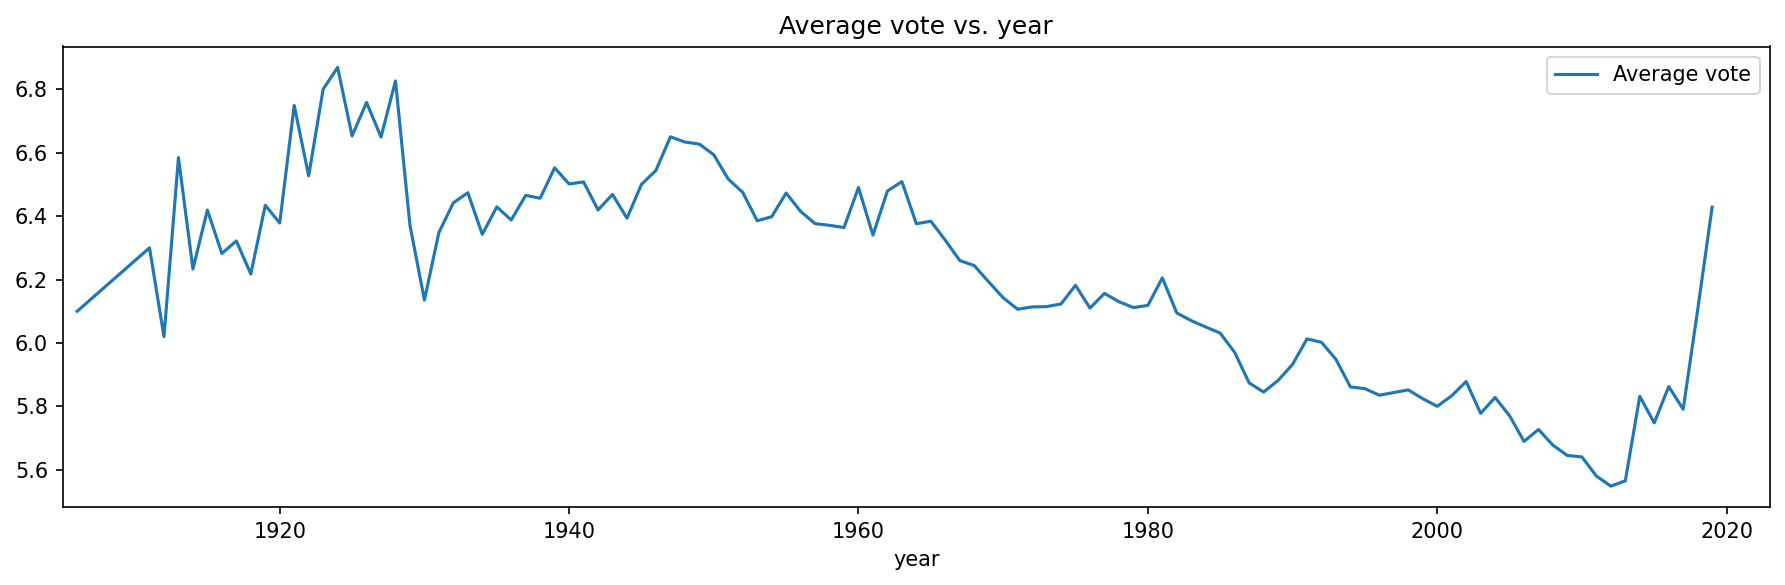

In [23]:
plt.figure(figsize=(12, 4), dpi=150)
ax = plt.gca()
vote_by_year.plot(kind='line', x='year', y='avg_vote', ax=ax)
ax.legend(['Average vote'])
ax.set_title('Average vote vs. year')
plt.xlim([1905, 2023])
plt.tight_layout();

I conducted an analysis to explore the variations between reviews from users and reviews from critics. The following histograms display the distribution of both types of reviews, offering insights into their characteristics.

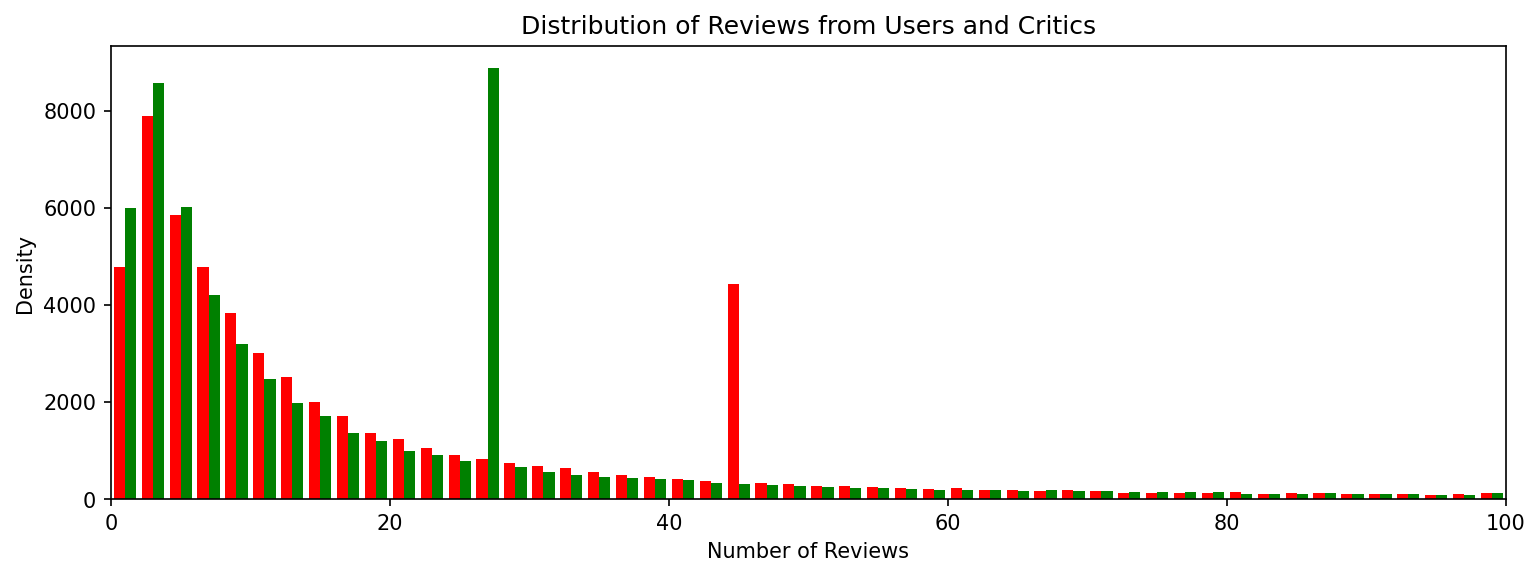

In [24]:
plt.figure(figsize=(12, 4), dpi=150)
plt.hist([full_dataset['reviews_from_users'], full_dataset['reviews_from_critics']], color=['r','g'], bins=50, range=(0, 100))
plt.xlabel('Number of Reviews')
plt.ylabel('Density')
plt.title('Distribution of Reviews from Users and Critics')
plt.xlim([0, 100]);

### Actors

Let's divide the actors into categorical features - most popular, average popularity, and low popularity. First, let's select all the actors and create a dataframe with the number of roles for each of the actors.

In [25]:
actors = full_dataset['actors']
actors_dict = {}

for actor_data in actors:
    if not pd.isna(actor_data):
        all_actors = actor_data.split(',')
        for actor in all_actors:
            actor = actor.strip()
            if actor not in actors_dict:
                actors_dict[actor] = 1
            else:
                actors_dict[actor] += 1


In [26]:
actors_dict = {k: v for k, v in sorted(actors_dict.items(), reverse=True, key=lambda item: item[1])}
actors_df = pd.DataFrame(list(actors_dict.items()), columns=['name', 'amount_roles'])
actors_df

,name,amount_roles
0,Brahmanandam,203
1,Anupam Kher,171
2,John Carradine,158
3,Christopher Lee,146
4,Amitabh Bachchan,145
...,...,...
294834,Skylor Lopez,1
294835,Adrian Spurlock,1
294836,Damien Moses,1
294837,Nito Larioza,1


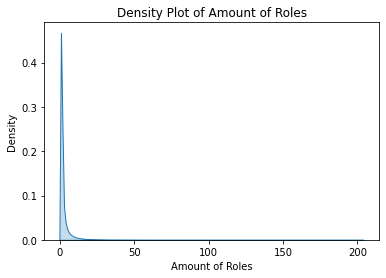

In [27]:
sns.kdeplot(actors_df['amount_roles'], shade=True)
plt.xlabel('Amount of Roles')
plt.ylabel('Density')
plt.title('Density Plot of Amount of Roles')
plt.show()

We see that a very small number of actors get a very large number of roles. For the 0.8 quantile the number of roles is 3, let’s conditionally divide for average popularity - 2 and for low - only one role in the film

In [28]:
quant_0_8 = actors_df['amount_roles'].quantile(0.8)

We can assign that at least 3 roles in film - popular actor, 2 - average popularity actor, 1 - low popularity actor

In [29]:
high_popular = quant_0_8
midddle_popular = 2

In [30]:
popular_actors = set()
average_popularity_actors = set()
low_popularity_actors = set()

for index, row in actors_df.iterrows():
    if row['amount_roles'] >= high_popular:
        popular_actors.add(row['name'])
    elif row['amount_roles']==midddle_popular:
        average_popularity_actors.add(row['name'])
    else:
        low_popularity_actors.add(row['name'])


Here we can make columns which keep track of how many popular, middle-popular, and low-popularity actors are associated with each movie

In [31]:
full_dataset = full_dataset.copy()
for category in ['popular_actor', 'middle_popular_actor', 'low_popular_actor']:
    if category not in full_dataset:
        full_dataset[category] = 0

for index, row in full_dataset.iterrows():
    if not isinstance(row['actors'], (int, float)):
        actors_list = row['actors'].split(', ')
        for actor in actors_list:
            if actor in popular_actors:
                full_dataset.at[index, 'popular_actor'] += 1
            elif actor in average_popularity_actors:
                full_dataset.at[index, 'middle_popular_actor'] += 1
            else:
                full_dataset.at[index, 'low_popular_actor'] += 1


In [32]:
full_dataset = full_dataset.drop(columns = ['actors'])

### Writer and director

For a writer and director, this approach is not very indicative. But we can use reviews from critics and users as a criterion. First, let's find the average value for both reviews:

In [33]:
full_dataset['avg_reviews'] = (full_dataset['reviews_from_users'] + full_dataset['reviews_from_critics'])/2

In [34]:
quant_0_75 = full_dataset['avg_reviews'].quantile(0.75)

In [35]:
popular_writers = set()
popular_directors = set()

for i, row in full_dataset.iterrows():
    if row['avg_reviews'] > quant_0_75:
        directors = row['director'].split(',')
        for director in directors:
            popular_directors.add(director)
                
        writers = row['writer'].split(',')
        for writer in writers:
            popular_writers.add(writer)


In [36]:
full_dataset = full_dataset.copy()

for category in ['popular_director', 'popular_writer']:
    if category not in full_dataset:
        full_dataset[category] = 0

for index, row in full_dataset.iterrows():
    try:
        writers = [w.strip() for w in row['writer'].split(',')]
        directors = [d.strip() for d in row['director'].split(',')]
    except AttributeError:
        writers = [row['writer'].strip()]
        directors = [row['director'].strip()]

    if any(writer in popular_writers for writer in writers):
        full_dataset.at[index, 'popular_writer'] = 1
    else:
        full_dataset.at[index, 'popular_writer'] = 0

    if any(director in popular_directors for director in directors):
        full_dataset.at[index, 'popular_director'] = 1
    else:
        full_dataset.at[index, 'popular_director'] = 0


We can drop the rest columns:

In [37]:
full_dataset = full_dataset.drop(columns=['writer', 'director', 'reviews_from_users', 'reviews_from_critics'])

### Genre and production company

For genre and film company, we can select some ratings, for example, top 10 film companies and genres.

In [38]:
full_dataset['production_company'].unique()

array(['J. and N. Tait', 'Fotorama', 'Helen Gardner Picture Players', ...,
       'Nobody', 'Silent Movies', 'Animate Projects Limited'],
      dtype=object)

In [39]:
top_10_companies = list(full_dataset['production_company'].value_counts().head(11).index)

In [40]:
top_10_companies = top_10_companies[1:]

In [41]:
full_dataset['top_10_company'] = np.where(full_dataset.production_company.isin(top_10_companies), 1, 0)

In [42]:
full_dataset = full_dataset.drop(columns=['production_company'])

In [43]:
genres_dict = {}

for index, row in full_dataset.iterrows():
    try:
        genres = [g.strip() for g in row['genre'].split(',')]
    except AttributeError:
        genres = [row['genre'].strip()]
        
    for genre in genres:
        if genre not in genres_dict:
            genres_dict[genre]= 1
        else:
            genres_dict[genre]+=1
        

In [44]:
genres_dict = {k: v for k, v in sorted(genres_dict.items(), reverse=True, key=lambda item: item[1])}
genres_df = pd.DataFrame(list(genres_dict.items()), columns=['genre', 'amount'])

In [45]:
genres_df.head(10)

,genre,amount
0,Drama,33130
1,Comedy,20944
2,Romance,10471
3,Action,8890
4,Crime,8434
5,Thriller,7092
6,Horror,6008
7,Adventure,5634
8,Mystery,3497
9,Fantasy,2763


In [46]:
top_10_genres = list(genres_df['genre'].head(10))

In [47]:
top_10_genres

['Drama',
 'Comedy',
 'Romance',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Adventure',
 'Mystery',
 'Fantasy']

We can create a binary encoding for the top 10 genres. It initializes columns for each of the top 10 genres with 0 and then sets them to 1 if a movie in the dataset belongs to that genre.

In [48]:
for genre in top_10_genres:
    full_dataset[genre] = 0

for index, row in full_dataset.iterrows():
    try:
        genres = [g.strip() for g in row['genre'].split(',')]
    except AttributeError:
        genres = [row['genre'].strip()]

    for genre in genres:
        if genre in top_10_genres:
            full_dataset.at[index, genre] = 1
        else:
            continue


In [49]:
full_dataset = full_dataset.drop(columns=['genre'])

### Country and language

In [50]:
full_dataset

,year,duration,country,language,avg_vote,popular_actor,middle_popular_actor,low_popular_actor,avg_reviews,popular_director,...,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Fantasy
0,1906,70,Australia,Other,6.1,1,0,12,7.0,0,...,1,0,0,0,1,0,0,0,0,0
1,1911,53,"Germany, Denmark",Other,5.9,1,1,4,3.0,0,...,1,0,0,0,0,0,0,0,0,0
2,1912,100,USA,English,5.2,0,1,12,13.5,0,...,1,0,0,0,0,0,0,0,0,0
3,1911,68,Italy,Italian,7.0,0,0,7,21.0,0,...,1,0,0,0,0,0,0,1,0,1
4,1912,60,USA,English,5.7,1,0,8,8.5,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60193,2011,106,Vietnam,Vietnamese,6.8,0,2,3,3.5,0,...,1,0,0,0,0,0,0,0,0,0
60194,2011,121,India,"Hindi, English",7.2,8,4,3,28.5,1,...,1,0,0,1,1,0,0,0,0,0
60195,2011,45,UK,English,6.8,0,0,0,5.0,0,...,0,0,0,0,0,0,0,0,0,0
60196,2012,87,USA,English,3.9,5,2,8,7.0,0,...,0,0,0,0,1,1,0,0,0,0


In [51]:
def add_length_feature(df, col, suffix=''):
    lengths = []
    
    for i in range(df.shape[0]):
        try:
            lengths.append(len(df[col][i].split(', ')))
        except:
            lengths.append(-1)

    lengths_cleaned = [length for length in lengths if length != -1]
    median_length = np.median(lengths_cleaned)

    for i in range(len(lengths)):
        if lengths[i] == -1:
            lengths[i] = median_length

    new_col_name = col + '_num' + suffix
    df[new_col_name] = lengths
    df = df.drop(columns=[col])

add_length_feature(full_dataset, 'language')

In [52]:
country_dict = {}

for index, row in full_dataset.iterrows():
    try:
        countries = [g.strip() for g in row['country'].split(',')]
    except AttributeError:
        countries = [row['country'].strip()]
        
    for country in countries:
        if country not in country_dict:
            country_dict[country]= 1
        else:
            country_dict[country]+= 1

In [53]:
country_dict = {k: v for k, v in sorted(country_dict.items(), reverse=True, key=lambda item: item[1])}
country_df = pd.DataFrame(list(country_dict.items()), columns=['country', 'amount'])

In [54]:
top_10_country = list(country_df['country'].head(10))

In [55]:
for country in top_10_country:
    full_dataset[country] = 0

for index, row in full_dataset.iterrows():
    try:
        countries = [c.strip() for c in row['country'].split(',')]
    except AttributeError:
        countries = [row['country'].strip()]

    for country in countries:
        if country in top_10_country:
            full_dataset.at[index, country] = 1
        else:
            continue

In [56]:
full_dataset = full_dataset.drop(columns=['country', 'year', 'language'])

In [57]:
full_dataset.language_num = full_dataset.language_num.astype(float)

We have got a full encoding dataset:

In [58]:
full_dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
duration,70.0,53.0,100.0,68.0,60.0,85.0,120.0,120.0,55.0,121.0
avg_vote,6.1,5.9,5.2,7.0,5.7,6.8,6.2,6.7,5.5,6.7
popular_actor,1.0,1.0,0.0,0.0,1.0,9.0,1.0,1.0,1.0,5.0
middle_popular_actor,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0
low_popular_actor,12.0,4.0,12.0,7.0,8.0,5.0,12.0,14.0,8.0,9.0
avg_reviews,7.0,3.0,13.5,21.0,8.5,10.0,5.0,2.0,4.0,9.0
popular_director,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
popular_writer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
top_10_company,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


2.2 Split data into train and test

In [59]:
train, test = train_test_split(full_dataset, test_size=0.2, random_state=44)

y_train = train.avg_vote
y_test = test.avg_vote
X_train = train.drop(['avg_vote'], axis=1)
X_test = test.drop(['avg_vote'], axis=1)

### Part 3.

Train and compare the models

3.1. Select models, you are going to train, select hyperparameters that have to be tunes.
3.2 Use cross-validation to compare models and select best set of hyperparameters

In [60]:
features = X_train.columns.tolist()
transformer = Pipeline([
    ('scaler', StandardScaler())
])

column_transformer = ColumnTransformer(
    transformers=[
        ('num', transformer, features)
    ]
)

In [61]:
models = [
    ('Linear Regression', LinearRegression, {}),
    ('Lasso Regression', Lasso, {
        'model__alpha': [0.01, 0.1, 1.0, 10.0],
        'model__random_state': [13]
    }),
    ('Ridge Regression', Ridge, {
        'model__alpha': [0.01, 0.1, 1.0, 10.0],
        'model__random_state': [13]
    }),
    ('Support Vector Regressor', SVR, {
         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'model__C': [0.1, 1.0, 5.0, 10.0],
         'model__epsilon': [0.1, 0.2, 0.3, 0.5]
    }),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor, {
        'model__n_neighbors': [1, 2, 3, 5, 7], 
        'model__weights': ['uniform', 'distance'], 
        'model__p': [1, 2]
    }),
    ('Random Forest Regressor', RandomForestRegressor, {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10, 15, 20, 30], 
        'model__min_samples_split': [2, 5, 10, 15, 20],
        'model__min_samples_leaf': [1, 2, 5, 7]
    }),
    ('Gradient Boosting Regressor', GradientBoostingRegressor, {
        'model__n_estimators': [100, 200],
        'model__max_depth': [2, 3, 5],
        'model__learning_rate': [0.01, 0.1, 0.2]
    }),
]

def best_model(X_train, y_train, models):    
    best_mean_absolute_error = None
    best_model_name = None
    best_model = None
    
    start = time.time()
    for model_name, model_cls, param_grid in models:
        
        end = time.time()
        print(f'{model_name} in progress, time: {round(end - start,3)} seconds')

        model_pipeline = Pipeline([
            ('preprocessor', column_transformer),
            ('model', model_cls())
        ])
        
        grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        mean_absolute_error = abs(grid_search.best_score_)
        
        if best_mean_absolute_error is None or mean_absolute_error < best_mean_absolute_error:
            best_mean_absolute_error = mean_absolute_error
            best_model_name = model_name
            best_model = grid_search.best_estimator_
    
    return best_mean_absolute_error, best_model_name, best_model



In [118]:
best_mae, best_model_name, best_model = best_model(X_train, y_train, models)
print(f'Best Model: {best_model_name}')
print(f'Best MAE: {best_mae}')

Linear Regression in progress, time: 0.0 seconds
Lasso Regression in progress, time: 6.203 seconds
Ridge Regression in progress, time: 8.105 seconds
K-Nearest Neighbors Regressor in progress, time: 8.947 seconds
Random Forest Regressor in progress, time: 3924.224 seconds
Gradient Boosting Regressor in progress, time: 9891.179 seconds
Best Model: Gradient Boosting Regressor
Best MAE: 0.69529077202938


3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?

In [64]:
def predict(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    
    return y_pred, mae

y_pred, test_mae = predict(best_model, X_test, y_test)

print(f'Mean Absolute Error on Test Data: {test_mae}')


Mean Absolute Error on Test Data: 0.6978016485789272


Text(0.5, 1.0, 'Average votes vs Predicted average votes')

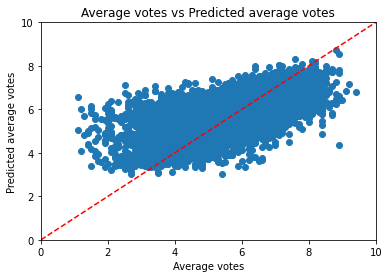

In [68]:
plt.axis([0,10,0,10])
plt.scatter(y_test, y_pred)

index_arr = [n for n in range(11)]
plt.plot(index_arr,'r--')             
plt.xlabel("Average votes")
plt.ylabel("Predicted average votes")
plt.title("Average votes vs Predicted average votes")

The best model we developed for predicting movie ratings, based on average votes was a `gradient boosting regressor`. This model was refined using various hyperparameters to achieve optimal performance. When tested, the predictions it generated on our dataset `The mean absolute error is approximately 0.698`. This means that, on average, the model's predictions differed from the actual valuation by about 0.698 units. It is a powerful and reliable model for predicting movie ratings based on available features.